In [155]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [156]:
# Read the dataset
sp = pd.read_csv('Data/50_Startups.csv')

In [157]:
# Display the dataset
display(sp)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [158]:
# Check for missing values
missing_values = sp.isnull().sum()
display(missing_values)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [159]:
# There are no missing values in the dataset

# Drop duplicate rows
sp.drop_duplicates(inplace=True)

# Drop columns with only one unique value
sp = sp.loc[:, sp.apply(pd.Series.nunique) != 1]

# Display the descriptive statistics of the dataset
display(sp.describe())

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: xlabel='State', ylabel='count'>

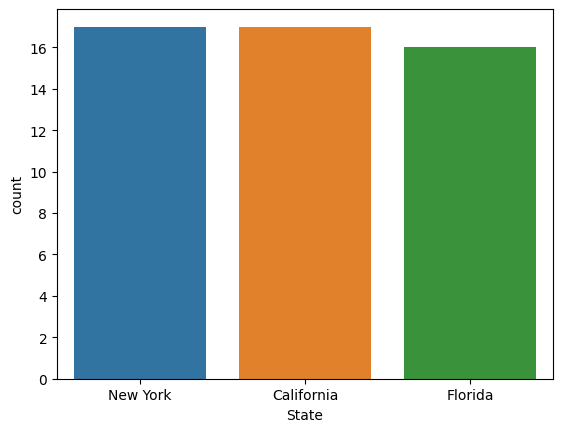

In [160]:
# There are no duplicate rows or any missing values in the dataset

# Plot the count of each category in the 'State' column
sns.countplot(data=sp, x='State')

<Axes: xlabel='variable', ylabel='value'>

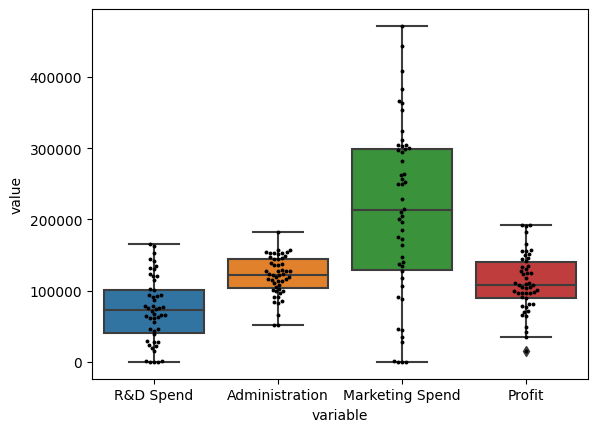

In [161]:
# We can see that there are no trailing spaces or typos or inconsistent capitalization in the 'State' column

# Melt the dataset for plotting boxplots and swarmplots
sp_melted = pd.melt(sp, value_vars=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'])

# Create a boxplot and swarmplot to visualize the distribution of the numerical variables
sns.boxplot(x='variable', y='value', data=sp_melted)
sns.swarmplot(x='variable', y='value', data=sp_melted, size=2.8, color='black')

In [162]:
# There are almost no outliers as visible from the boxplots in the dataset
# Still, to take care of any errors eyeballing may have caused, we will remove the outliers
# We will use the IQR method to remove the outliers

num_col = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for col in num_col:
    iqr = stats.iqr(sp[col])
    lower_bound = np.quantile(sp[col], 0.25) - (iqr * 1.5)
    upper_bound = np.quantile(sp[col], 0.75) + (iqr * 1.5)
    sp = sp[(sp[col] > lower_bound) & (sp[col] < upper_bound)] # Drop the row even if one column has an outlier

In [163]:
# Perform one-hot encoding on the 'State' column
ohe = OneHotEncoder(sparse_output=False) 
encoded_data = ohe.fit_transform(sp['State'].values.reshape(-1, 1))
encoded_df = pd.DataFrame(encoded_data, columns=ohe.categories_[0])
sp = pd.concat([sp, encoded_df], axis=1)
sp.drop('State', axis=1, inplace=True)

# Move the 'Profit' column to the end of the DataFrame
sp['Profit'] = sp.pop('Profit')

In [164]:
# All the numerical features have same scale
# It has yet to be determined what kind of model will be used, 
# which is required for choosing a suitable scaling technique for that model. 
# As of now the numerical features will features will not be scaled

# display the cleaned dataset
display(sp)

# Save the cleaned dataset
sp.to_csv('Data/preprocessed_data.csv', index=False)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,192261.83
1,162597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,166187.94
5,131876.90,99814.71,362861.36,0.0,0.0,1.0,156991.12
6,134615.46,147198.87,127716.82,1.0,0.0,0.0,156122.51
7,130298.13,145530.06,323876.68,0.0,1.0,0.0,155752.60
8,120542.52,148718.95,311613.29,0.0,0.0,1.0,152211.77
9,123334.88,108679.17,304981.62,1.0,0.0,0.0,149759.96


In [165]:
# Separate the features and target
X = sp.iloc[:, :-1]
y = sp.iloc[:, -1].to_frame()

# Display the features and target
display(X.head())
display(y.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
